## Vorhersage des Gerätezustands basierend auf der Hardware- und Softwareleistung

### Exploratory Data Analysis

In [74]:
#Pandas für dataframes
import pandas as pd

#Numpy for numerical computing
import numpy as np

#Matplotlib für visualizierung
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from matplotlib import pyplot

#Display plots in the notebook
%matplotlib inline 

#Seaborn for easier visualization
import seaborn as sns

#Stats package for statistical analysis
from scipy import stats

#Machine learning packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV  
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, confusion_matrix, classification_report, cohen_kappa_score 
from sklearn.utils import resample
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold



#Packages for deep learning models
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier


In [14]:
#Loading the data set
data = pd.read_csv("D:\DossierPython\PythonAnaConda\projekt\dataset.csv", parse_dates=True)
data_df= data.loc[:, ~data.columns.str.match('Unnamed')]
data_df.loc[:, ~data_df.columns.str.match('Unnamed')]
data_cleaned = data_df.copy()
data_cleaned['date'] = pd.to_datetime(data_df.date)

In [61]:
#Types of Data(Variables)
data_cleaned.info()

Most of the variables are numeric. Let's look at the first and last 5 rows of the data:

In [60]:
data_cleaned.head()

Let's now check if the variables have any missing values:

In [62]:
#Checking for NaNs
for i in data_cleaned.columns:
    print(i, ": ", data_cleaned.loc[:,i].isnull().values.any())

Next, let's look at the distributions of the numerical variables in the data set:

In [64]:
#Distributions of the numerical variables
data_cleaned.describe()

Let's drop the erroneous instances

In [23]:
#Dropping the erroneous instances
df_cleaned = data_cleaned.loc[(data_cleaned['free_physical_memory'] > 0)]
df_cleaned = data_cleaned.loc[(data_cleaned['free_virtual_memory'] > 0)]
df_cleaned = data_cleaned.loc[(data_cleaned['average_time_since_last_boot'] > 0)]

The time period represented in the Dataset:

In [24]:
print('Earliest date:', min(data_cleaned['date']))
print('Latest date:', max(data_cleaned['date']))

Earliest date: 2017-10-01 00:00:00
Latest date: 2017-12-31 00:00:00


let's look at the number of responses by zone:

In [65]:
data_cleaned.groupby('zone').count().reset_index()

Let's now look  the mean values of the variables per each zone:

In [66]:
#Summary of the variables' means by zone
data_cleaned.groupby('zone').mean()

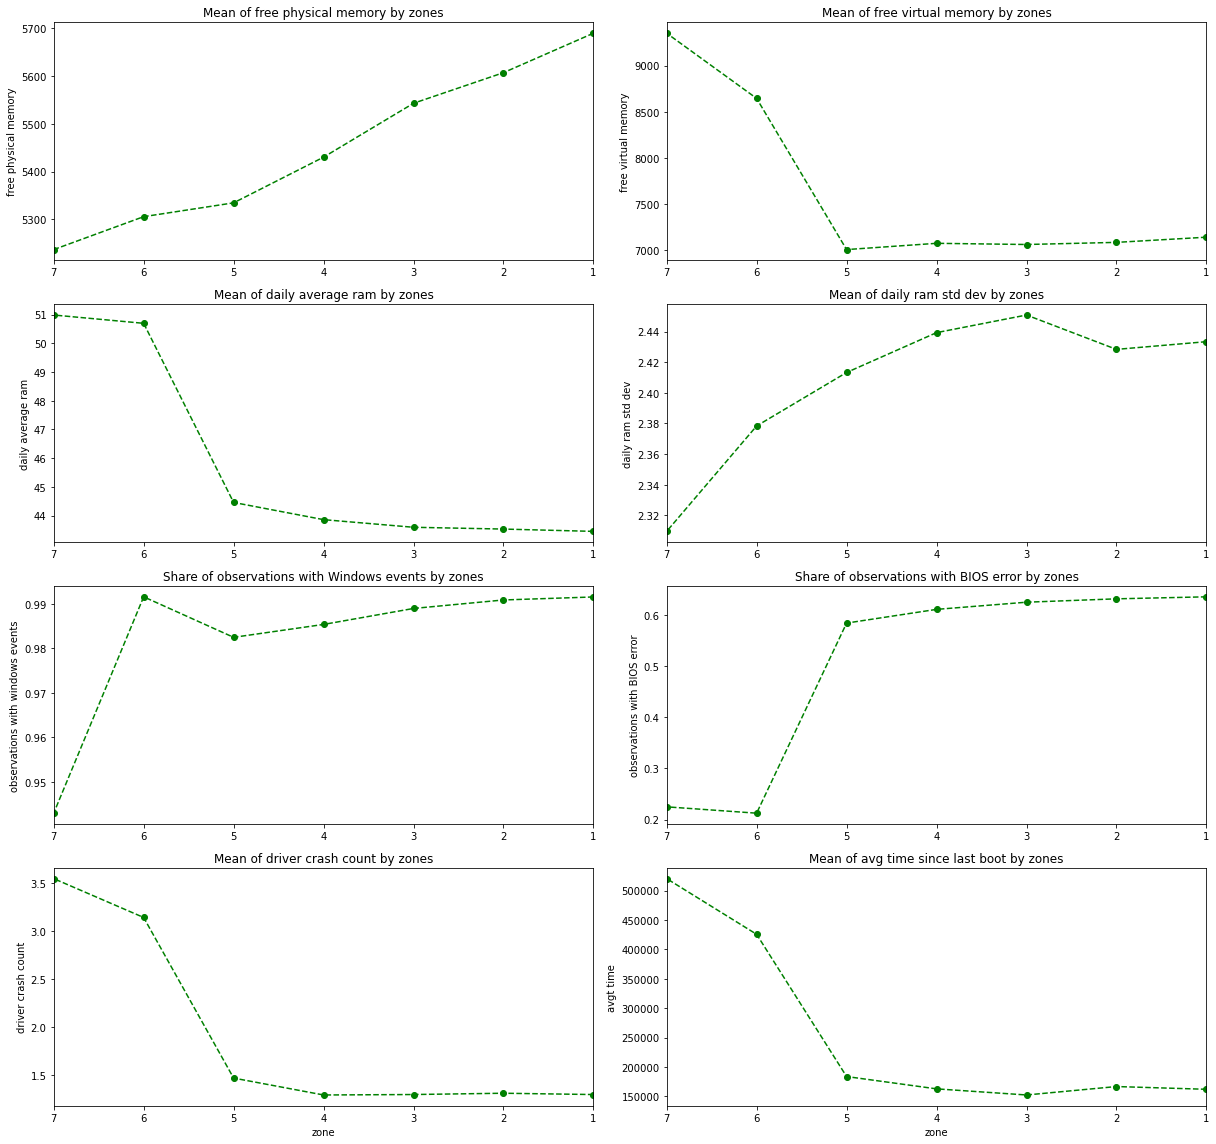

In [27]:
#Converting a 'groupby' object to a DataFrame
data_means = data_cleaned.groupby('zone').mean().reset_index()

#Plotting the charts
plt.figure(figsize=(17,16))
plt.subplot(4,2,1)
plt.title('Mean of free physical memory by zones')
plt.plot('zone', 'free_physical_memory', data= data_means,color='green', marker='o', linestyle='dashed')
plt.ylabel('free physical memory')
plt.xlim(7,1)

plt.subplot(4,2,2)
plt.title('Mean of free virtual memory by zones')
plt.plot('zone', 'free_virtual_memory', data= data_means,color='green', marker='o', linestyle='dashed')
plt.ylabel('free virtual memory')
plt.xlim(7,1)

plt.subplot(4,2,3)
plt.title('Mean of daily average ram by zones')
plt.plot('zone', 'daily_average_ram', data= data_means,color='green', marker='o', linestyle='dashed')
plt.ylabel('daily average ram')
plt.xlim(7,1)

plt.subplot(4,2,4)
plt.title('Mean of daily ram std dev by zones')
plt.plot('zone', 'daily_std_dev_ram', data= data_means,color='green', marker='o', linestyle='dashed')
plt.ylabel('daily ram std dev')
plt.xlim(7,1)

plt.subplot(4,2,5)
plt.title('Share of observations with Windows events by zones')
plt.plot('zone', 'windows_events_count', data= data_means,color='green', marker='o', linestyle='dashed')
plt.ylabel('observations with windows events')
plt.xlim(7,1)

plt.subplot(4,2,6)
plt.title('Share of observations with BIOS error by zones')
plt.plot('zone', 'has_bios_error', data= data_means,color='green', marker='o', linestyle='dashed')
plt.ylabel('observations with BIOS error')
plt.xlim(7,1)

plt.subplot(4,2,7)
plt.title('Mean of driver crash count by zones')
plt.plot('zone', 'driver_crash_count', data= data_means,color='green', marker='o', linestyle='dashed')
plt.xlabel('zone')
plt.ylabel('driver crash count')
plt.xlim(7,1)

plt.subplot(4,2,8)
plt.title('Mean of avg time since last boot by zones')
plt.plot('zone', 'average_time_since_last_boot', data= data_means,color='green', marker='o', linestyle='dashed')
plt.xlabel('zone')
plt.ylabel('avgt time')
plt.xlim(7,1)

plt.tight_layout() 
plt.show()

Let's now look  the Distribution of the variables per each zone:

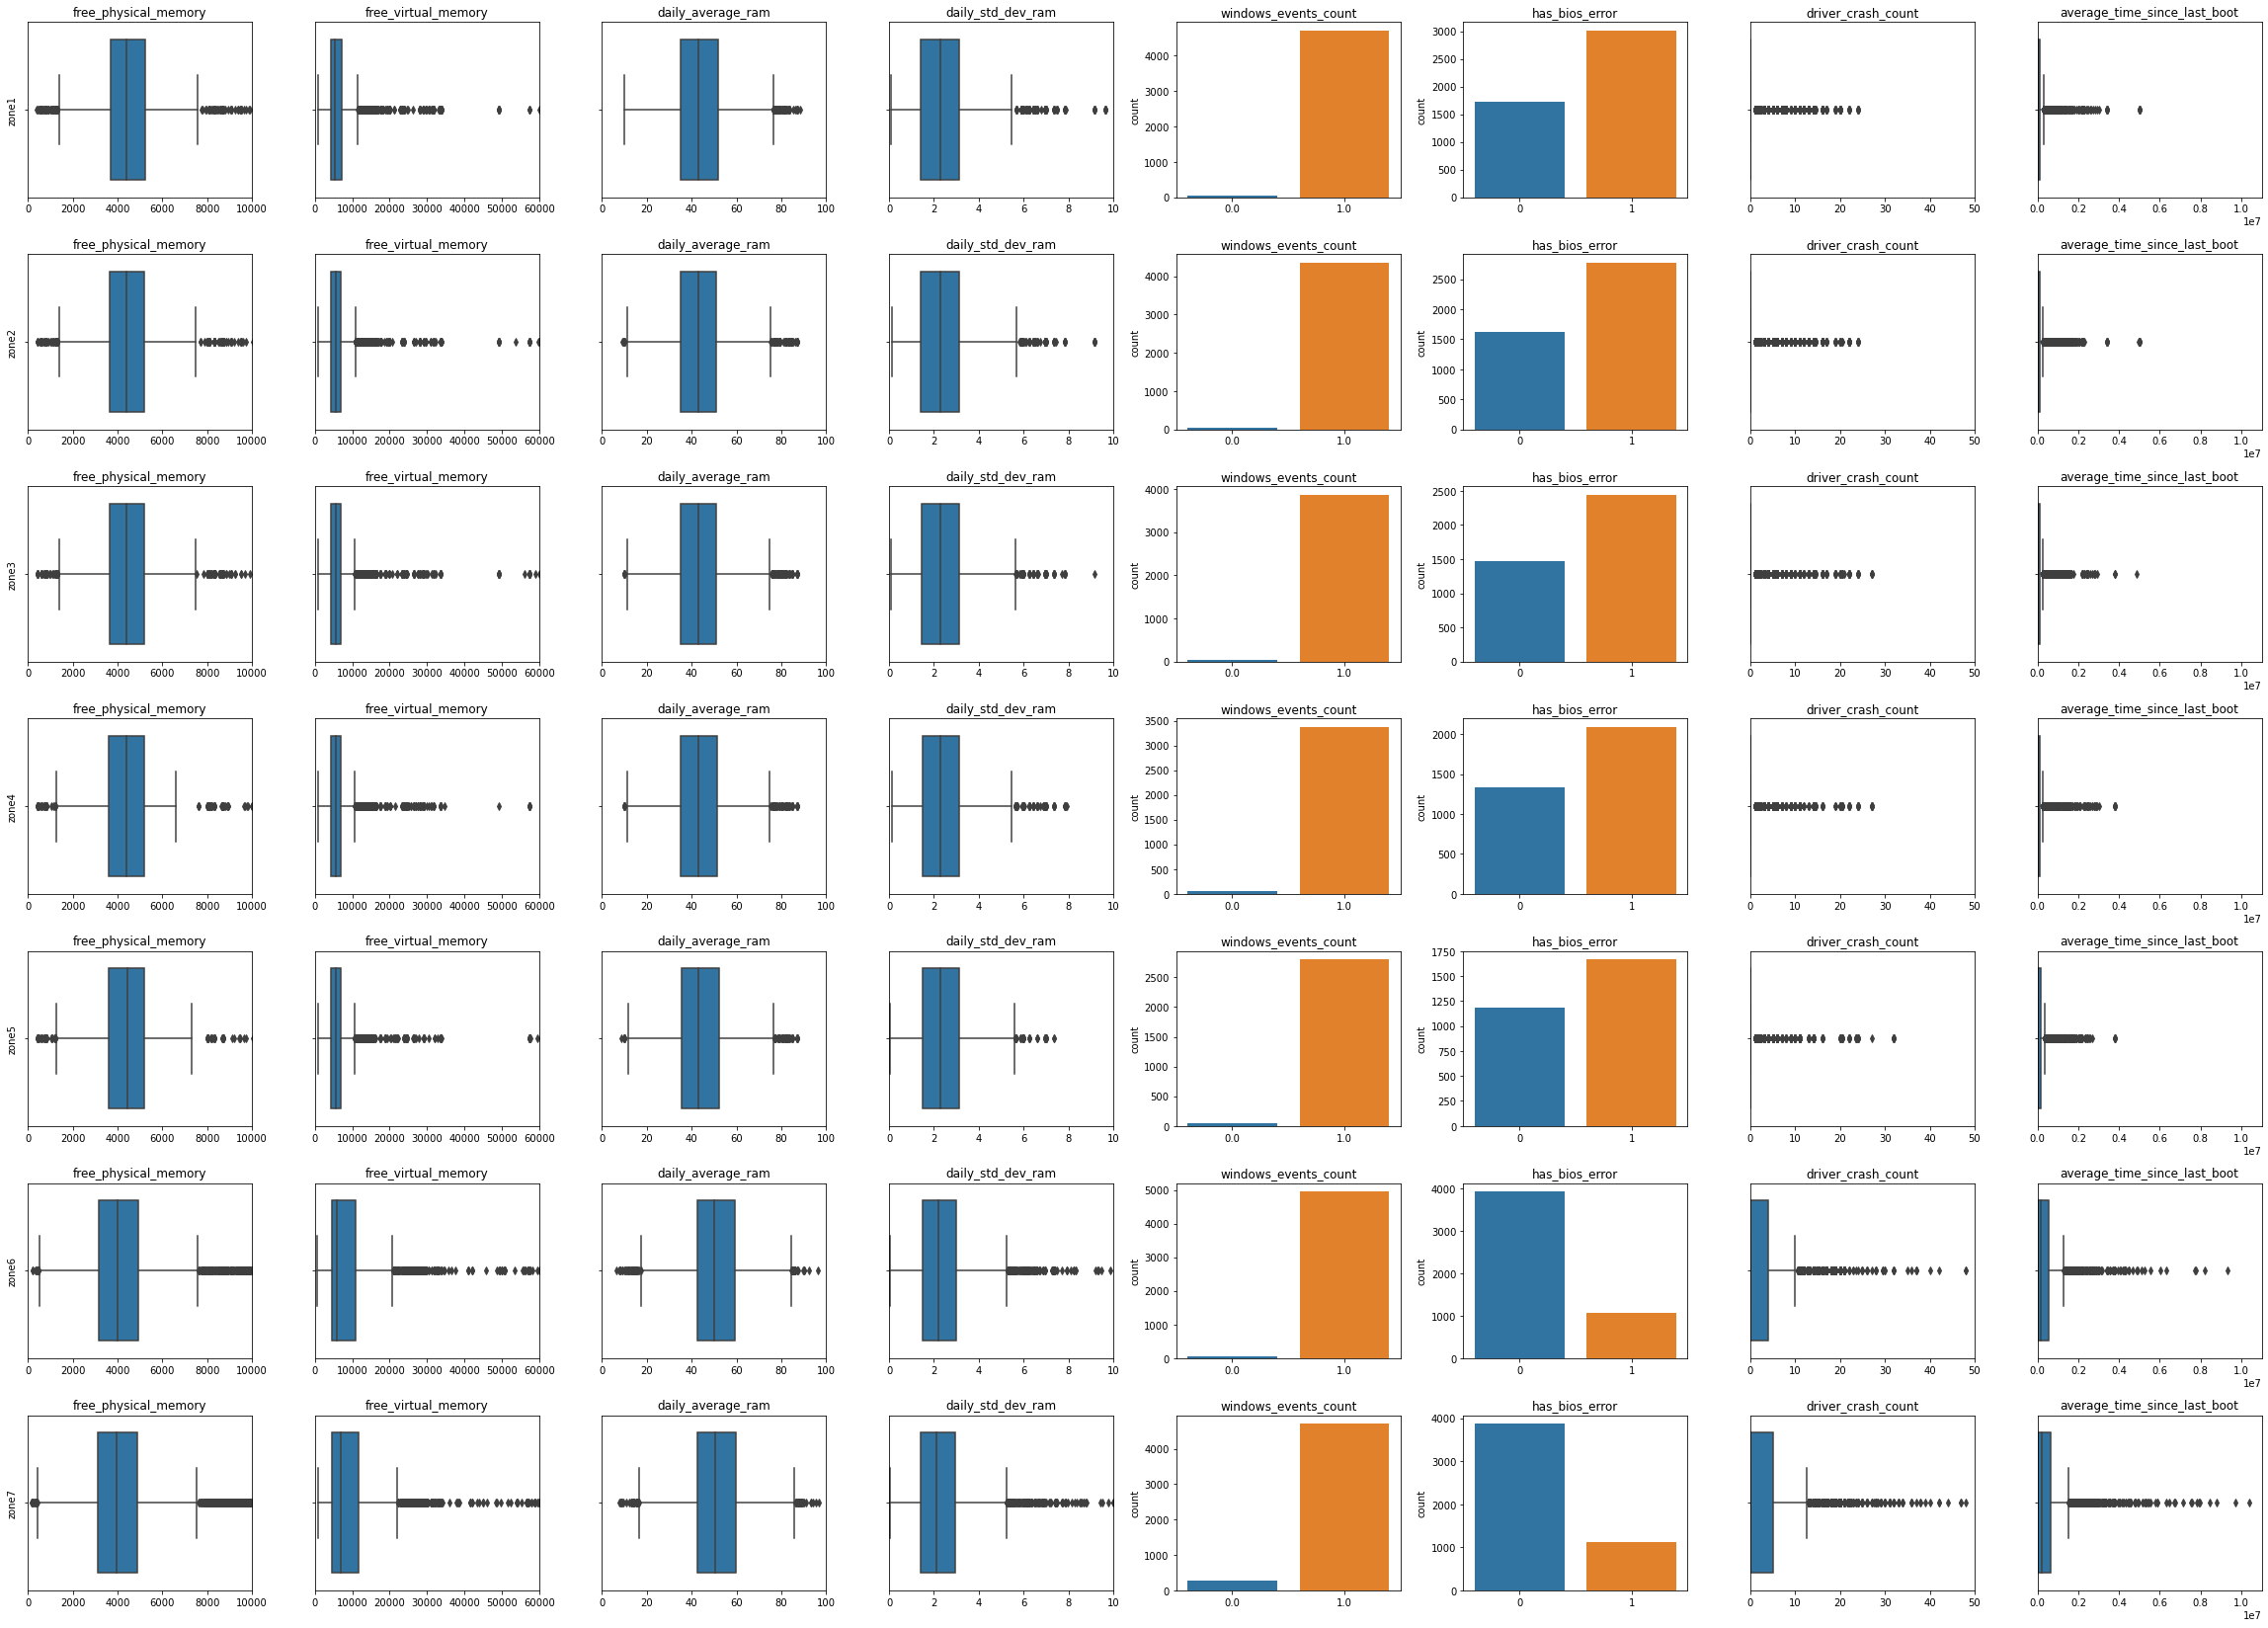

In [28]:
plt.figure(figsize=(32,23))

count = 1
for k in range(1,8):
        
        plt.subplot(7,8,count)
        plt.title("free_physical_memory")
        sns.boxplot(x="free_physical_memory", data=data_cleaned.loc[data_cleaned["zone"] == k])
        plt.ylabel("zone" + str(k))
        plt.xlabel(" ")
        plt.xlim(0, 10000)
        count += 1
        

        plt.subplot(7,8,count)
        plt.title("free_virtual_memory")
        sns.boxplot(x="free_virtual_memory", data=data_cleaned.loc[df_cleaned["zone"] == k])
        plt.xlabel(" ")
        plt.xlim(0, 60000)
        count += 1
        
        plt.subplot(7,8,count)
        plt.title("daily_average_ram")
        sns.boxplot(x="daily_average_ram", data=data_cleaned.loc[data_cleaned["zone"] == k])
        plt.xlabel(" ")
        plt.xlim(0,100)
        count += 1

        plt.subplot(7,8,count)
        plt.title("daily_std_dev_ram")
        sns.boxplot(x='daily_std_dev_ram', data=data_cleaned.loc[df_cleaned["zone"] == k])
        plt.xlabel(" ")
        plt.xlim(0,10)
        count += 1

        plt.subplot(7,8,count)
        plt.title("windows_events_count")
        sns.countplot(x="windows_events_count", data=data_cleaned.loc[data_cleaned["zone"] == k])
        plt.xlabel(' ')
        count += 1

        plt.subplot(7,8,count)
        plt.title('has_bios_error')
        sns.countplot(x="has_bios_error", data=data_cleaned.loc[data_cleaned["zone"] == k])
        plt.xlabel(' ')
        count += 1

        plt.subplot(7,8,count)
        plt.title("driver_crash_count")
        sns.boxplot(x="driver_crash_count", data=data_cleaned.loc[data_cleaned["zone"] == k])
        plt.xlabel(" ")
        plt.xlim(0,50)
        count += 1

        plt.subplot(7,8,count)
        plt.title("average_time_since_last_boot")
        sns.boxplot(x="average_time_since_last_boot", data=data_cleaned.loc[data_cleaned["zone"] == k])
        plt.xlabel(" ")
        plt.xlim(0, 11000000)
        count += 1

plt.tight_layout() 
plt.show()

Detect and remove outliers in Dataset

In [29]:
cols =["free_physical_memory", 
        "free_virtual_memory",
        "daily_average_ram",
        "daily_std_dev_ram", 
        "driver_crash_count", 
        "average_time_since_last_boot"]

Q1 = data_cleaned[cols].quantile(0.25)
Q3 = data_cleaned[cols].quantile(0.75)
IQR = Q3 - Q1

df_cleaned_without_Outliers = data_cleaned[~((data_cleaned[cols] < (Q1 - 1.5 * IQR)) |(data_cleaned[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
#df_cleaned_without_Outliers

### Statistical Analysis

Let's plot the correlation heatmap for the dataset:

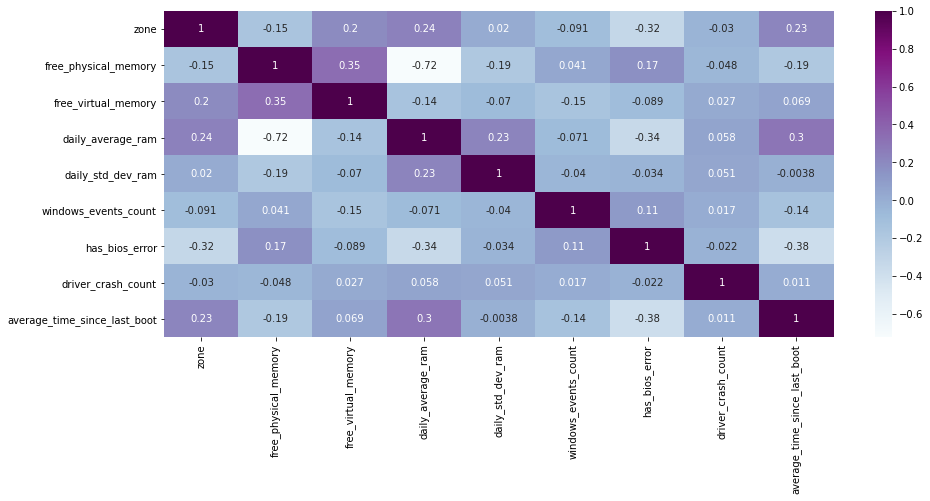

In [30]:
#Calculate correlations between the features and predictor
correlations = df_cleaned_without_Outliers.corr()
plt.figure(figsize=(15,6))
#Plot heatmap of correlations
_ = sns.heatmap(correlations, cmap="BuPu", annot=True)

### Resampling the Data Set

Aus der Analyse von Dataset kann man feststellen, dass  mehrre Messungen in Zuständen 6 und 7 im verglch zur Zuständen 1 bis 5 wurden angenommen.

In [40]:
#Separating zones 1 and 5
dfzone_1_5 = df_cleaned_without_Outliers[((df_cleaned_without_Outliers.zone!=6) & (df_cleaned_without_Outliers.zone!=7))]

#Separating zones 6 and 7 
dfzone_6 = df_cleaned_without_Outliers[df_cleaned_without_Outliers.zone==6]
dfzone_7 = df_cleaned_without_Outliers[df_cleaned_without_Outliers.zone==7]

#Resampling zones 6-7
dfzone_6_downsampled = resample(dfzone_6, replace=True, n_samples=2000, random_state=40)
dfzone_7_downsampled = resample(dfzone_7, replace=True, n_samples=2000, random_state=40)

#Concatenating into one downsampled data frame
df_resampled = pd.concat([dfzone_1_5, dfzone_6_downsampled, dfzone_7_downsampled])

#Checking the resulting counts of observations
#df_resampled.groupby('zone').count().reset_index()

### Fitting the Predictive Models

#### 1- Logistic Regression

In [39]:
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)


#Splitting the variables into predictor and target variables. We need to drop 'pcid' and 'date' variables, 
X = df_resampled.drop(['zone', 'pcid', 'date'], axis=1)
y = df_resampled.zone

#Creating a pipeline with the StandardScaler and one-vs-rest logistic regression object
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=42, multi_class='ovr'))

#Calculating an array of cross-validated scores
scores = cross_val_score(pipeline, X, y, cv=10)

#Displaying the mean prediction accuracy for 95% confidence interval
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.24 (+/- 0.03)


In [87]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41, stratify=y)

In [90]:
#Fitting the model
pipeline.fit(X_train, y_train)

#Creating the classification report
print(classification_report(y_test, pipeline.predict(X_test)))

              precision    recall  f1-score   support

           1       0.22      0.62      0.32       932
           2       0.17      0.11      0.13       868
           3       0.15      0.01      0.02       784
           4       0.00      0.00      0.00       685
           5       0.00      0.00      0.00       576
           6       0.26      0.54      0.35       600
           7       0.41      0.37      0.39       600

    accuracy                           0.24      5045
   macro avg       0.17      0.24      0.17      5045
weighted avg       0.17      0.24      0.17      5045



In [91]:
cohen_kappa_score(y_test, pipeline.predict(X_test))

0.09929064221523343

#### 2- Random Forest and 
#### 3- Gradient Boosting

Trainierung von Randon Forest and Gradiant Boosting 

In [93]:
#Setting up pipelines with a StandardScaler function to normalize the variables
pipelines = {
    'rf' : make_pipeline(StandardScaler(), 
                         RandomForestClassifier(random_state=42, class_weight='balanced')),
    'gb' : make_pipeline(StandardScaler(), 
                         GradientBoostingClassifier(random_state=42))
}

#Setting up the "rule of thumb" hyperparameters for the Random Forest
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]
}

#Setting up the "rule of thumb" hyperparameters for the Gradient Boost
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

#Creating the dictionary of hyperparameters
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

#Creating an empty dictionary for fitted models
fitted_alternative_models = {}

# Looping through model pipelines, tuning each with GridSearchCV and saving it to fitted_logreg_models
for name, pipeline in pipelines.items():
    #Creating cross-validation object from pipeline and hyperparameters
    alt_model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    #Fitting the model on X_train, y_train
    alt_model.fit(X_train, y_train)
    
    #Storing the model in fitted_logreg_models[name] 
    fitted_alternative_models[name] = alt_model
    
    #Printing the status of the fitting
    print(name, 'has been fitted.')

rf has been fitted.
gb has been fitted.


In [94]:
#Displaying the best_score_ for each fitted model
for name, model in fitted_alternative_models.items():
    print(name, model.best_score_ )

rf 0.37581725128454097
gb 0.3540647269953011


Both models perform much better than Logistic Regression, with Random Forest giving the best result. Let's look at the accuracy scores:

In [95]:
#Creating an empty dictionary for predicted models
predicted_alternative_models = {}

#Predicting the response variables and displaying the prediction score
for name, model in fitted_alternative_models.items():
    y_pred = model.predict(X_test)
    predicted_alternative_models[name] = accuracy_score(y_test, y_pred)

predicted_alternative_models

{'rf': 0.37998017839445, 'gb': 0.34905847373637267}

The scores on the test data set are very close to the train data set scores, so the models perform well on both data sets. The parameters of the model with the highest score:

In [96]:
fitted_alternative_models['rf'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

Confusion matrix for the best model:

In [97]:
#Creating the confusion matrix
pd.crosstab(y_test, fitted_alternative_models['rf'].predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,3,4,5,6,7,All
True,,,,,,,,
1,218,140,115,130,267,28,34,932
2,136,147,124,130,280,23,28,868
3,54,77,148,170,293,22,20,784
4,18,28,80,159,364,13,23,685
5,11,20,36,155,319,17,18,576
6,7,4,2,4,12,452,119,600
7,3,3,8,3,4,105,474,600
All,447,419,513,751,1539,660,716,5045


In [98]:
#Creating the classification report
print(classification_report(y_test, fitted_alternative_models['rf'].predict(X_test)))

              precision    recall  f1-score   support

           1       0.49      0.23      0.32       932
           2       0.35      0.17      0.23       868
           3       0.29      0.19      0.23       784
           4       0.21      0.23      0.22       685
           5       0.21      0.55      0.30       576
           6       0.68      0.75      0.72       600
           7       0.66      0.79      0.72       600

    accuracy                           0.38      5045
   macro avg       0.41      0.42      0.39      5045
weighted avg       0.41      0.38      0.37      5045



The model detects all zones (unlike Logistic Regression model), with the highest precision and recall for zones 6-7. Finally, let's look at the Kappa score:

In [99]:
cohen_kappa_score(y_test, fitted_alternative_models['rf'].predict(X_test))

0.28409323615011683

Train other models (classification) and compare their performance
#### Test options for classification

LR: 0.226686 (0.008432)
KNN: 0.282357 (0.008968)
CART: 0.288358 (0.011563)
NB: 0.222686 (0.011871)
SVM: 0.205934 (0.009080)
NN: 0.181348 (0.014965)
AB: 0.240854 (0.010483)
GBM: 0.264606 (0.013398)
RF: 0.322694 (0.011576)
ET: 0.323195 (0.008842)


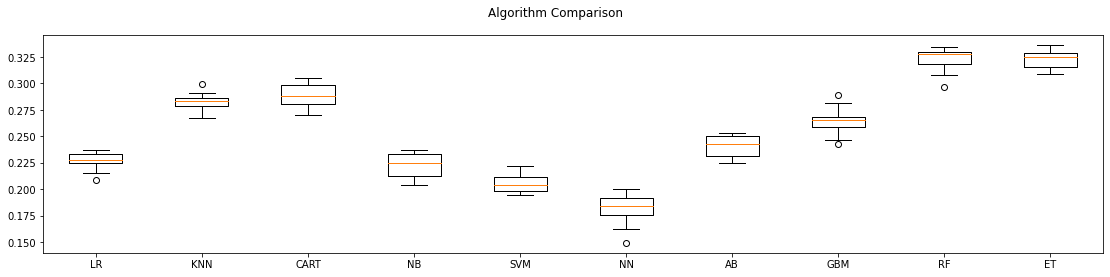

In [75]:
from warnings import filterwarnings
filterwarnings('ignore')



X = df_cleaned_without_Outliers.drop(["zone", "pcid", "date"], axis=1)
y = df_cleaned_without_Outliers.zone
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41, stratify=y)

seed= 41
num_folds = 10
#setting the evaluation metric
scoring = 'accuracy'

#check Classification algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#Neural Network
models.append(('NN', MLPClassifier()))

# Ensemble Models
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))

# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

results = []
names = []


for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    resu = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(resu)
    
    ## vergleich algorithmen
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(19,4)
pyplot.show()


In [80]:
#Grid Search: GradientBoosting Tuning
n_estimators = [20,180,1000]
max_depth= [2, 3,5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring,cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.300776 using {'max_depth': 5, 'n_estimators': 180}


The score is significantly better than for the Logistic Regression model but still not very high. Let's now try a more sophisticated modeling approach.

Let's now try a more sophisticated modeling approach: Neural Network Model

In [ ]:
#Setting the seed
np.random.seed(41)

#Separating predictors into a variable
df_features = df_resampled.drop(['zone', 'pcid', 'date'], axis=1)

#Standardazing the predictors
scaler = StandardScaler()
predictors = pd.DataFrame(scaler.fit_transform(df_features)
target = to_categorical(df_resampled.zone.astype(int) - 1, num_classes=7)

#Defining input shape
n_cols=predictors.shape[1]

#Defining the model
def nn_model():
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7, activation='softmax'))
    #Compiling the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model